In [130]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [131]:
data = yf.download('^GSPC', start='2000-01-01', end='2025-01-01')
print(data.head())



[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   931800000
2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971  1009000000
2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044  1085500000
2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985  1092300000
2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951  1225200000


In [132]:
print(data.isnull().sum())
data = data.drop_duplicates()
print("----------------------------------------")
data.index = pd.to_datetime(data.index)
print(data.index)
print(data.describe())



Price   Ticker
Close   ^GSPC     0
High    ^GSPC     0
Low     ^GSPC     0
Open    ^GSPC     0
Volume  ^GSPC     0
dtype: int64
----------------------------------------
DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=6289, freq=None)
Price         Close         High          Low         Open        Volume
Ticker        ^GSPC        ^GSPC        ^GSPC        ^GSPC         ^GSPC
count   6289.000000  6289.000000  6289.000000  6289.000000  6.289000e+03
mean    2112.014193  2123.846701  2098.696135  2111.727483  3.351107e+09
std     1243.313309  1248.723568  1237.150430  1243.102750  1.490823e+09
m

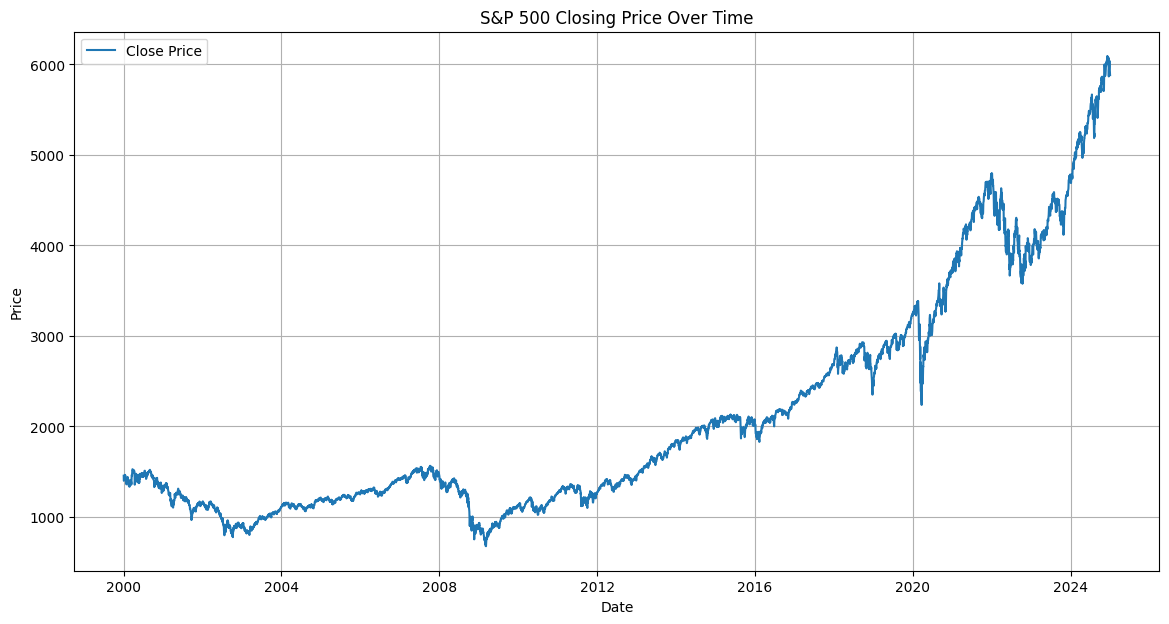

In [133]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.title('S&P 500 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

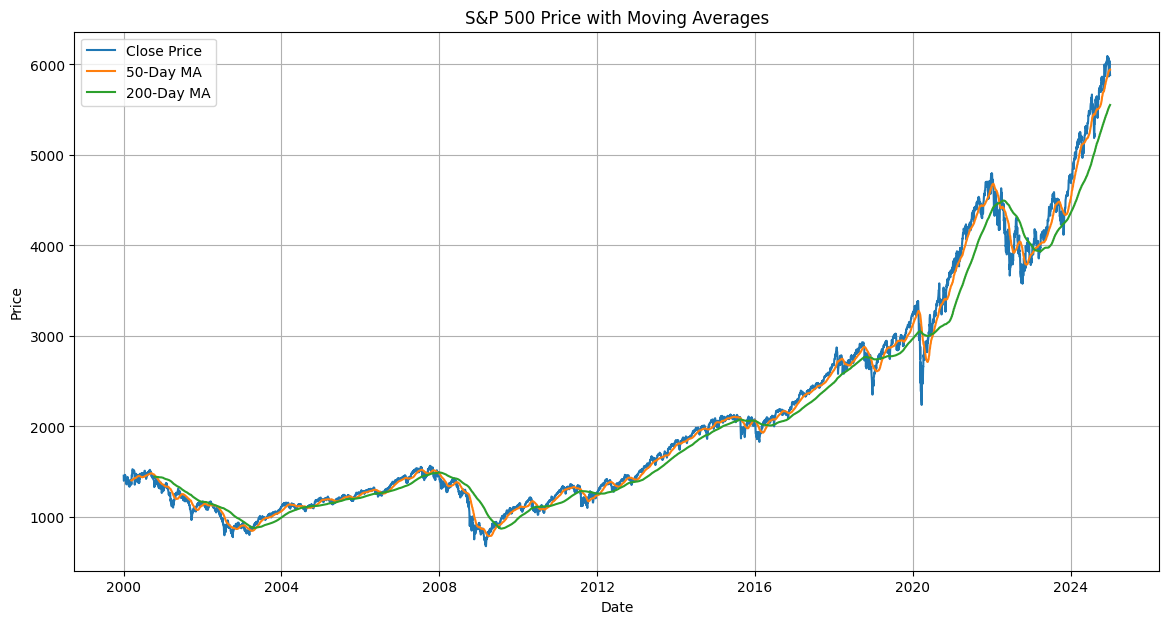

In [134]:
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA50'], label='50-Day MA')
plt.plot(data['MA200'], label='200-Day MA')
plt.title('S&P 500 Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


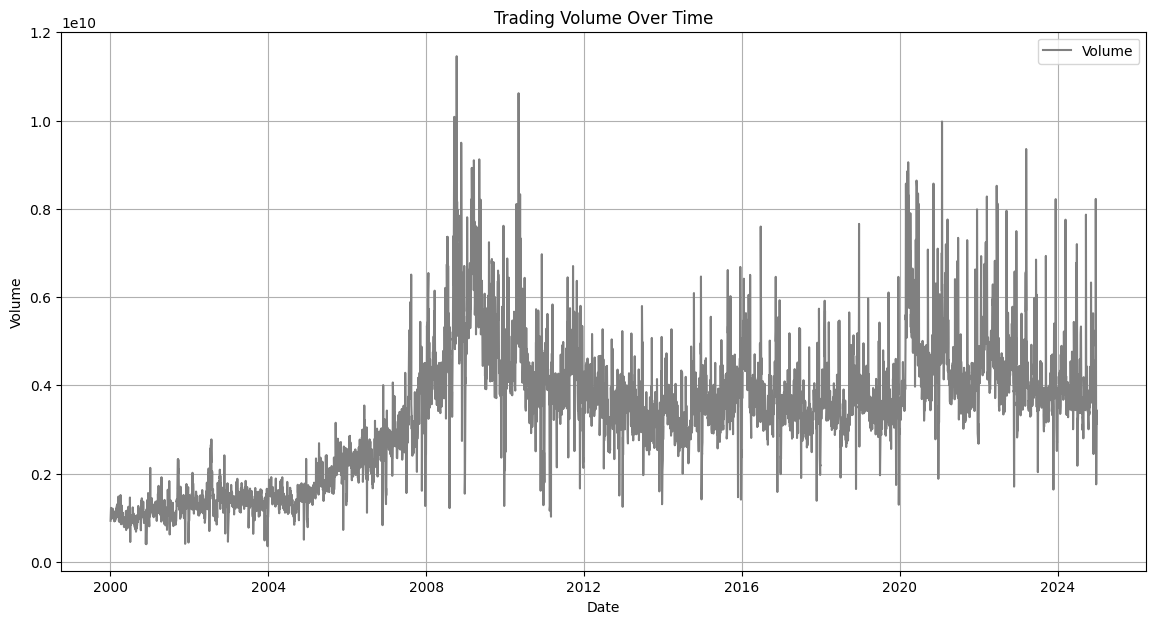

In [135]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume'], label='Volume', color='gray')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()



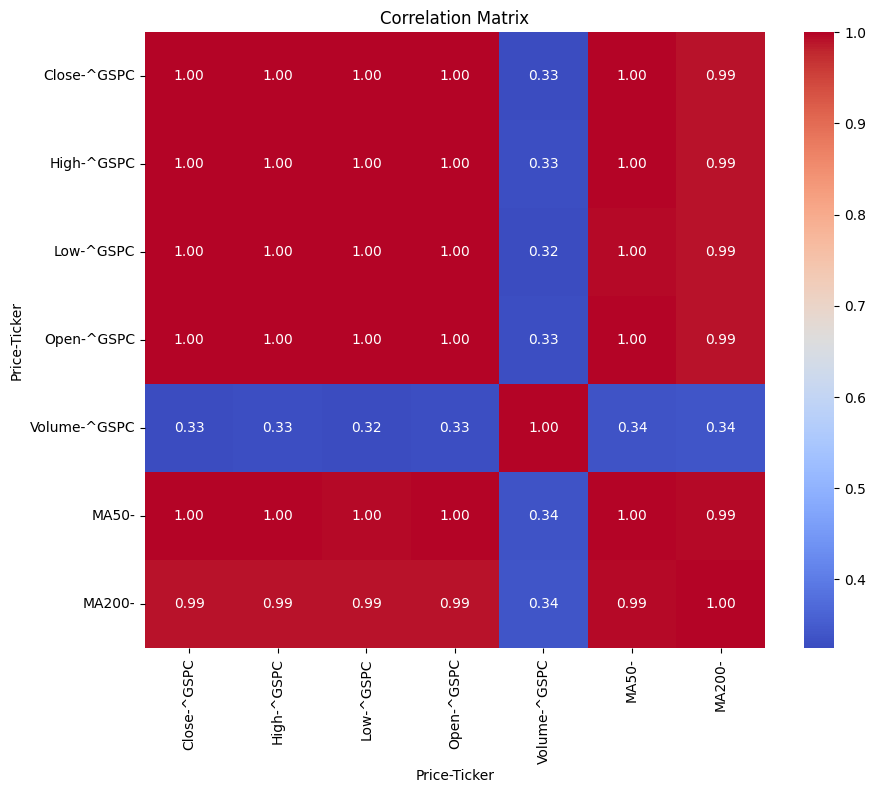

In [136]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [137]:

# Resetiranje indeksa kako bi spljostili multi indeksirane stupce na jednostavne
data.reset_index(inplace=True)

print(data.head(15))


Price        Date        Close         High          Low         Open  \
Ticker                   ^GSPC        ^GSPC        ^GSPC        ^GSPC   
0      2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   
1      2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971   
2      2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044   
3      2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985   
4      2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951   
5      2000-01-10  1457.599976  1464.359985  1441.469971  1441.469971   
6      2000-01-11  1438.560059  1458.660034  1434.420044  1457.599976   
7      2000-01-12  1432.250000  1442.599976  1427.079956  1438.560059   
8      2000-01-13  1449.680054  1454.199951  1432.250000  1432.250000   
9      2000-01-14  1465.150024  1473.000000  1449.680054  1449.680054   
10     2000-01-18  1455.140015  1465.150024  1451.300049  1465.150024   
11     2000-01-19  1455.900024  1461.390015  1448.6

In [138]:
print(data.columns) 
print(data.index)    
# Moramo zamijeniti multi index stupce sa normalnim stupcima




MultiIndex([(  'Date',      ''),
            ( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC'),
            (  'MA50',      ''),
            ( 'MA200',      '')],
           names=['Price', 'Ticker'])
RangeIndex(start=0, stop=6289, step=1)


In [139]:
data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]

# Pretvaranje iz multi indesiranih stupaca u normalno indeksirane
print(data.columns)
print(data.index)

Index(['Date_', 'Close_^GSPC', 'High_^GSPC', 'Low_^GSPC', 'Open_^GSPC',
       'Volume_^GSPC', 'MA50_', 'MA200_'],
      dtype='object')
RangeIndex(start=0, stop=6289, step=1)


In [140]:
print(data.head)
# Izbaciti stupce povezane s "Tickerom" i metapodacima 
data.drop([col for col in data.columns if 'Ticker' in col], axis=1, inplace=True)


<bound method NDFrame.head of           Date_  Close_^GSPC   High_^GSPC    Low_^GSPC   Open_^GSPC  \
0    2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   
1    2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971   
2    2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044   
3    2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985   
4    2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951   
...         ...          ...          ...          ...          ...   
6284 2024-12-24  6040.040039  6040.100098  5981.439941  5984.629883   
6285 2024-12-26  6037.589844  6049.750000  6007.370117  6024.970215   
6286 2024-12-27  5970.839844  6006.169922  5932.950195  6006.169922   
6287 2024-12-30  5906.939941  5940.790039  5869.160156  5920.669922   
6288 2024-12-31  5881.629883  5929.740234  5868.859863  5919.740234   

      Volume_^GSPC        MA50_       MA200_  
0        931800000          NaN          NaN  
1       1009000000     

In [141]:
print(data.head())
# Preimenovanje u originalna imena
data.rename(columns={
    'Date_': 'Date',
    'Close_^GSPC': 'Close',
    'High_^GSPC': 'High',
    'Low_^GSPC': 'Low',
    'Open_^GSPC': 'Open',
    'Volume_^GSPC': 'Volume',
    'MA50_': 'MA50',
    'MA200_': 'MA200'
}, inplace=True)


print(data.columns)


       Date_  Close_^GSPC   High_^GSPC    Low_^GSPC   Open_^GSPC  \
0 2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   
1 2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971   
2 2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044   
3 2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985   
4 2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951   

   Volume_^GSPC  MA50_  MA200_  
0     931800000    NaN     NaN  
1    1009000000    NaN     NaN  
2    1085500000    NaN     NaN  
3    1092300000    NaN     NaN  
4    1225200000    NaN     NaN  
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'MA50', 'MA200'], dtype='object')


In [142]:


data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Volatilnost (Standarna devijacija prihoda unutar prozora 10 dana)
data['Volatility'] = data['Close'].rolling(window=10).std()

# ROC - Rate of change
data['ROC'] = data['Close'].pct_change()

# Relative Strength Index (RSI)
window_length = 14
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window_length).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

data['Lag1'] = data['Close'].shift(1)
data['Lag2'] = data['Close'].shift(2)

# Target: 1 ako je close iduceg dan  > danasnji close, inace 0
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)
print("------------------------------------")
print(data.describe)


------------------------------------
<bound method NDFrame.describe of            Date        Close         High          Low         Open  \
0    2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   
1    2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971   
2    2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044   
3    2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985   
4    2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951   
...         ...          ...          ...          ...          ...   
6284 2024-12-24  6040.040039  6040.100098  5981.439941  5984.629883   
6285 2024-12-26  6037.589844  6049.750000  6007.370117  6024.970215   
6286 2024-12-27  5970.839844  6006.169922  5932.950195  6006.169922   
6287 2024-12-30  5906.939941  5940.790039  5869.160156  5920.669922   
6288 2024-12-31  5881.629883  5929.740234  5868.859863  5919.740234   

          Volume         MA50        MA200         MA10  Volatility       RO

In [143]:

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

In [144]:
data.dropna(inplace=True) 

data_weekly = data.resample('W').agg({
    'Close': 'last',              
    'MA10': 'mean',               
    'Volatility': 'mean',         
    'ROC': 'mean',                
    'RSI': 'mean',               
    'Lag1': 'last',               
    'Lag2': 'last'                
})
data_weekly.dropna(inplace=True)  


In [145]:
print(data_weekly.describe)
print(data_weekly.index.freq)
print(len(data_weekly)) 


<bound method NDFrame.describe of                   Close         MA10  Volatility       ROC        RSI  \
Date                                                                    
2000-10-22  1396.930054  1380.033406   30.320003  0.003443  36.013329   
2000-10-29  1379.579956  1372.777009   22.399995 -0.002430  42.028874   
2000-11-05  1426.689941  1391.205400   23.088295  0.006788  61.788826   
2000-11-12  1365.979980  1410.870981   23.708043 -0.008606  59.338344   
2000-11-19  1367.719971  1400.614985   28.724554  0.000340  47.870570   
...                 ...          ...         ...       ...        ...   
2024-12-08  6090.270020  6005.125576   48.356464  0.001915  67.108354   
2024-12-15  6051.089844  6054.218408   26.864826 -0.001277  69.501894   
2024-12-22  5930.850098  6040.701016   53.424397 -0.003911  44.833304   
2024-12-29  5970.839844  5995.073486   79.928924  0.001717  43.926741   
2025-01-05  5881.629883  5962.803467   74.160792 -0.007493  38.315151   

                

In [146]:
data_weekly['Target'] = (data_weekly['Close'].shift(-1) > data_weekly['Close']).astype(int)
data_weekly.dropna(inplace=True)


In [147]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

feature_cols = ['Close', 'MA10', 'Volatility', 'ROC', 'RSI', 'Lag1', 'Lag2']

split_date = '2024-01-01'
train_data = data_weekly.loc[:split_date].iloc[:-1]  
test_data = data_weekly.loc[split_date:].iloc[:-1]  

X_train = train_data[feature_cols]
y_train = train_data['Target']
X_test = test_data[feature_cols]
y_test = test_data['Target']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



Accuracy: 0.615
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.21      0.29        19
           1       0.65      0.85      0.74        33

    accuracy                           0.62        52
   macro avg       0.55      0.53      0.51        52
weighted avg       0.58      0.62      0.57        52

Confusion Matrix:
[[ 4 15]
 [ 5 28]]


Test Accuracy: 0.569
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.56      0.05      0.08       110
           1       0.57      0.97      0.72       143

    accuracy                           0.57       253
   macro avg       0.56      0.51      0.40       253
weighted avg       0.56      0.57      0.44       253

Confusion Matrix (Test Data):
[[  5 105]
 [  4 139]]


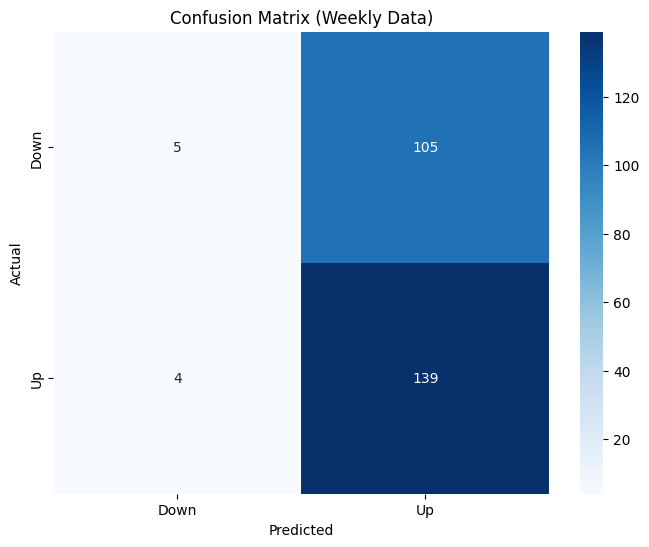

SVM Train Predictions (Random Split):
        Date  Prediction
0 2018-10-21           1
1 2017-06-25           1
2 2008-06-29           1
3 2021-02-07           1
4 2003-06-15           1
SVM Test Predictions (Random Split):
        Date  Prediction
0 2009-03-29           1
1 2021-01-10           1
2 2017-04-16           1
3 2018-03-04           1
4 2015-03-08           1


In [164]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and target using weekly data
feature_cols = ['Close', 'MA10', 'Volatility', 'ROC', 'RSI', 'Lag1', 'Lag2']

X = data_weekly[feature_cols]
y = (data_weekly['Close'].shift(-1) > data_weekly['Close']).astype(int)
data_weekly.dropna(inplace=True)

# Random train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on train and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy:.3f}")
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Data):")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix (Weekly Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create separate DataFrames for train and test predictions
train_df = pd.DataFrame({
    'Date': X_train.index,  # Dates from train set
    'Prediction': y_train_pred
})
test_df = pd.DataFrame({
    'Date': X_test.index,  # Dates from test set
    'Prediction': y_test_pred
})

# Save train and test predictions to separate CSV files
# train_df.to_csv('svm_train_random_predictions.csv', index=False)
test_df.to_csv('svm_test_RANDOM_predictions.csv', index=False)

# Display the DataFrames
print("SVM Train Predictions (Random Split):")
print(train_df.head())
print("SVM Test Predictions (Random Split):")
print(test_df.head())


In [151]:
svm_df = pd.DataFrame({
    'Date': test_data.index,  # Dates from the test set
    'Prediction': y_pred      # SVM predictions
})

# Save the predictions as a CSV file (optional)
svm_df.to_csv('svm_predictions.csv', index=False)

# Display the DataFrame
print("SVM Predictions Table:")
print(svm_df.head())

y_train_pred = model.predict(X_train_scaled)  # Predictions for training data
train_df = pd.DataFrame({
    'Date': train_data.index,  # Dates from the train set
    'Prediction': y_train_pred,
    'Dataset': 'Train'
})
train_df.to_csv("svm_traindata.csv", index = False)


SVM Predictions Table:
        Date  Prediction
0 2024-01-07           1
1 2024-01-14           1
2 2024-01-21           1
3 2024-01-28           1
4 2024-02-04           1


In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
from imblearn.over_sampling import SMOTE



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

feature_cols = ['Close', 'MA10', 'Volatility', 'ROC', 'RSI']  
X = data_weekly[feature_cols]
y = data_weekly['Target']

split_date = '2024-01-01'
train_data = data_weekly.loc[:split_date].iloc[:-1]
test_data = data_weekly.loc[split_date:].iloc[:-1]

X_train = train_data[feature_cols]
y_train = train_data['Target']
X_test = test_data[feature_cols]
y_test = test_data['Target']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_dist = {
    'C': uniform(0.1, 10),         
    'gamma': uniform(0.001, 0.1),  
    'kernel': ['rbf']             
}

random_search = RandomizedSearchCV(
    SVC(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,   # Increased folds
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy (CV):", random_search.best_score_)

y_pred = random_search.best_estimator_.predict(X_test_scaled)

print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 9.756320330745593, 'gamma': 0.08183973481164612, 'kernel': 'rbf'}
Best Accuracy (CV): 0.5644628099173554
Test Accuracy: 0.558
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.53      0.47        19
           1       0.68      0.58      0.62        33

    accuracy                           0.56        52
   macro avg       0.55      0.55      0.54        52
weighted avg       0.58      0.56      0.57        52

Confusion Matrix:
[[10  9]
 [14 19]]


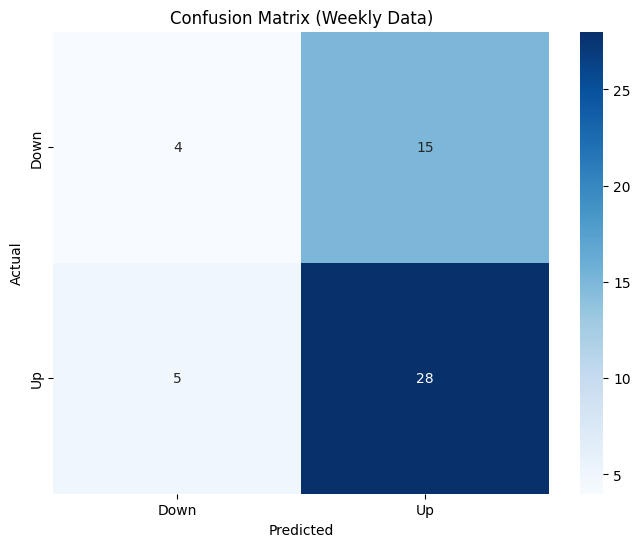

In [91]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix (Weekly Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




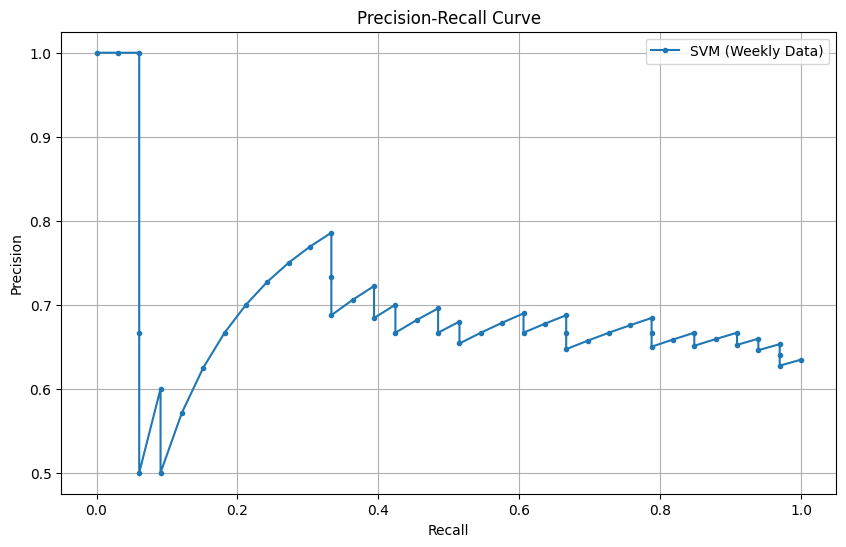

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

probs = model.decision_function(X_test_scaled)

precision, recall, _ = precision_recall_curve(y_test, probs)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='SVM (Weekly Data)')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()



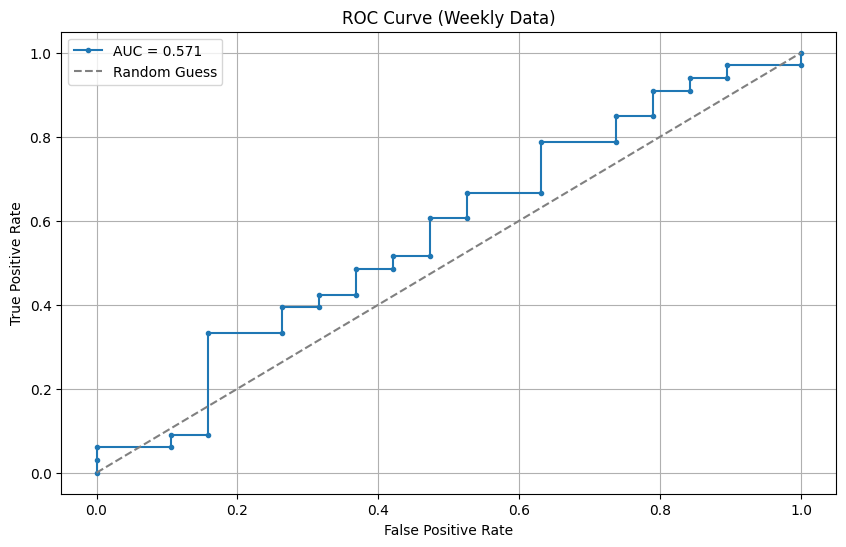

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probs = model.decision_function(X_test_scaled)

fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('ROC Curve (Weekly Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()



MSE: 0.0009314788972846853
MAE: 0.02220528992764765
R²: -0.2765269531628518


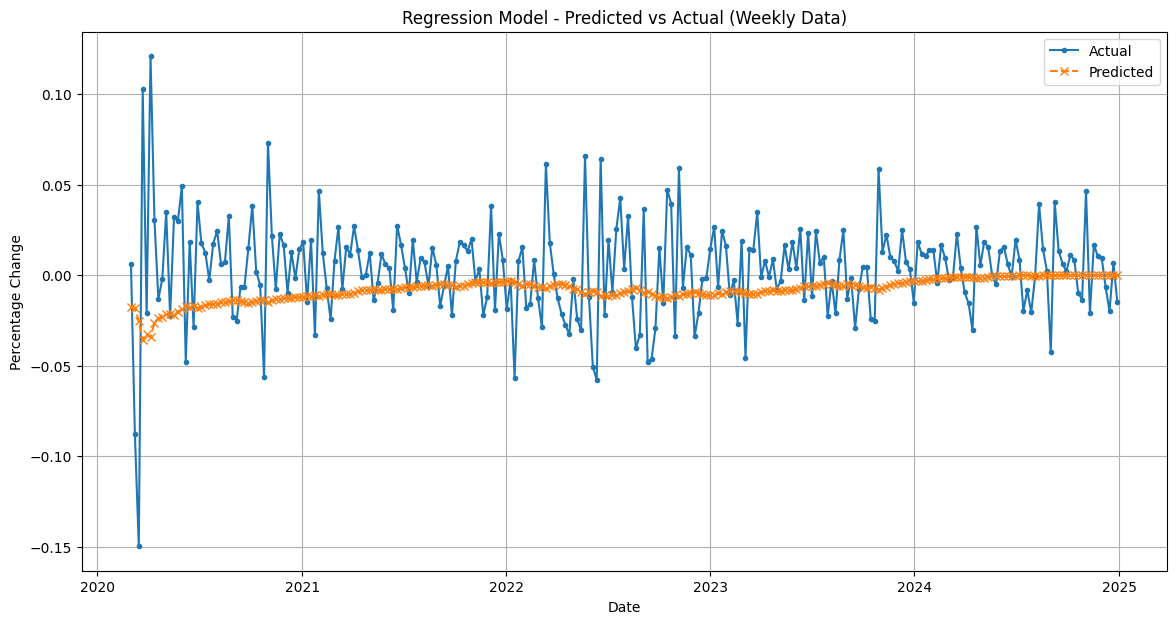

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

data_weekly['Target'] = data_weekly['Close'].pct_change().shift(-1)
data_weekly.dropna(inplace=True)

feature_cols = ['Close', 'MA10', 'Volatility', 'ROC', 'RSI', 'Lag1', 'Lag2']
X = data_weekly[feature_cols]
y = data_weekly['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = SVR(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', marker='.')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--', marker='x')
plt.title('Regression Model - Predicted vs Actual (Weekly Data)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()


In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


feature_cols = [
    'Close', 
    'MA10', 
    'Volatility', 
    'ROC', 
    'RSI', 
    'Lag1', 'Lag2'
]

X = data_weekly[feature_cols]
y = (data_weekly['Close'].shift(-1) > data_weekly['Close']).astype(int)
data_weekly.dropna(inplace=True) 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Accuracy: 0.565
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.57      1.00      0.72       143

    accuracy                           0.57       253
   macro avg       0.28      0.50      0.36       253
weighted avg       0.32      0.57      0.41       253

[[  0 110]
 [  0 143]]


C:\Users\Karlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Karlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Karlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

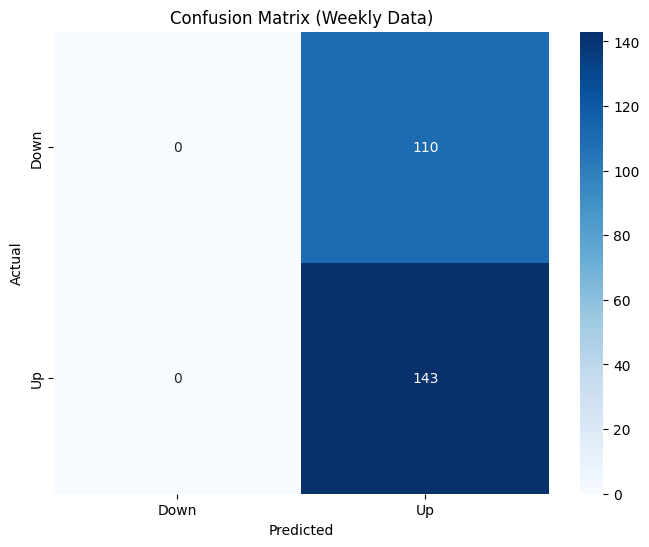

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = LogisticRegression(C = 0.5,class_weight={0: 1, 1: 1.2}, max_iter=100)  # Favor True (1)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix (Weekly Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [163]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_df = pd.DataFrame({
    'Date': X_train.index,  
    'Prediction': y_train_pred
})
test_df = pd.DataFrame({
    'Date': X_test.index, 
    'Prediction': y_test_pred
})

train_df.to_csv('logreg_train_predictions.csv', index=False)
test_df.to_csv('logreg_RANDOM_test_predictions.csv', index=False)

print("Logistic Regression Train Predictions:")
print(train_df.head())
print("Logistic Regression Test Predictions:")
print(test_df.head())

Logistic Regression Train Predictions:
        Date  Prediction
0 2018-10-21           1
1 2017-06-25           1
2 2008-06-29           1
3 2021-02-07           1
4 2003-06-15           1
Logistic Regression Test Predictions:
        Date  Prediction
0 2009-03-29           1
1 2021-01-10           1
2 2017-04-16           1
3 2018-03-04           1
4 2015-03-08           1


Test Accuracy: 0.623
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.62      1.00      0.77        33

    accuracy                           0.62        53
   macro avg       0.31      0.50      0.38        53
weighted avg       0.39      0.62      0.48        53



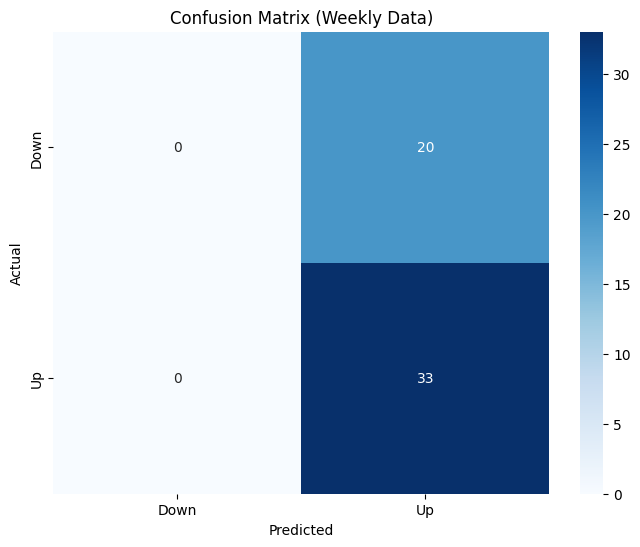

Logistic Regression Train Predictions:
        Date  Prediction
0 2000-10-22           1
1 2000-10-29           1
2 2000-11-05           1
3 2000-11-12           1
4 2000-11-19           1
Logistic Regression Test Predictions:
        Date  Prediction
0 2024-01-07           1
1 2024-01-14           1
2 2024-01-21           1
3 2024-01-28           1
4 2024-02-04           1


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target using weekly data
feature_cols = [
    'Close', 
    'MA10', 
    'Volatility', 
    'ROC', 
    'RSI', 
    'Lag1', 'Lag2'
]

X = data_weekly[feature_cols]
y = (data_weekly['Close'].shift(-1) > data_weekly['Close']).astype(int)
data_weekly.dropna(inplace=True)

# Split into train and test based on year 2024
train_data = data_weekly.loc[:"2024-01-01"].iloc[:-1]  # Train data up to 2023
test_data = data_weekly.loc["2024-01-01":]            # Test data for 2024

X_train = train_data[feature_cols]
y_train = train_data['Target']
X_test = test_data[feature_cols]
y_test = test_data['Target']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(C=0.5, class_weight={0: 1, 1: 1.2}, max_iter=100)
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy:.3f}")
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred, zero_division=0))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix (Weekly Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create separate DataFrames for train and test predictions
train_df = pd.DataFrame({
    'Date': X_train.index,  # Dates from train set
    'Prediction': y_train_pred
})
test_df = pd.DataFrame({
    'Date': X_test.index,  # Dates from test set
    'Prediction': y_test_pred
})

# Save train and test predictions to separate CSV files
train_df.to_csv('logreg_train_predictions.csv', index=False)
test_df.to_csv('logreg_test_predictions.csv', index=False)

# Display the DataFrames
print("Logistic Regression Train Predictions:")
print(train_df.head())
print("Logistic Regression Test Predictions:")
print(test_df.head())


Accuracy: 0.522
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.35      0.39       110
           1       0.57      0.65      0.61       143

    accuracy                           0.52       253
   macro avg       0.50      0.50      0.50       253
weighted avg       0.51      0.52      0.51       253



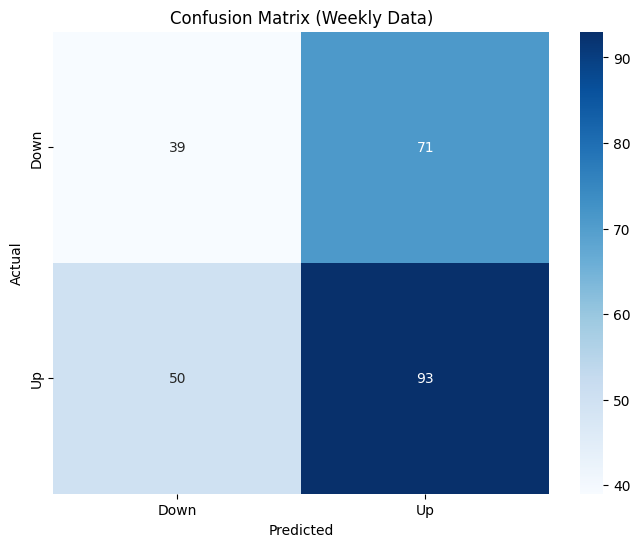

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

feature_cols = [
    'Close', 
    'MA10', 
    'Volatility', 
    'ROC', 
    'RSI', 
    'Lag1', 'Lag2'
]

X = data_weekly[feature_cols]
y = (data_weekly['Close'].shift(-1) > data_weekly['Close']).astype(int)
data_weekly.dropna(inplace=True)  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix (Weekly Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [159]:
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)

train_df = pd.DataFrame({
    'Date': X_train.index, 
    'Prediction': y_train_pred
})
test_df = pd.DataFrame({
    'Date': X_test.index,  
    'Prediction': y_test_pred
})

train_df.to_csv('random_forest_train_predictions.csv', index=False)
test_df.to_csv('random_forest_RANDOM_test_predictions.csv', index=False)

print("Random Forest Train Predictions:")
print(train_df.head())
print("Random Forest Test Predictions:")
print(test_df.head())

Random Forest Train Predictions:
        Date  Prediction
0 2018-10-21           0
1 2017-06-25           0
2 2008-06-29           0
3 2021-02-07           1
4 2003-06-15           1
Random Forest Test Predictions:
        Date  Prediction
0 2009-03-29           1
1 2021-01-10           1
2 2017-04-16           1
3 2018-03-04           1
4 2015-03-08           0


Test Accuracy: 0.377
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.36      0.85      0.51        20
           1       0.50      0.09      0.15        33

    accuracy                           0.38        53
   macro avg       0.43      0.47      0.33        53
weighted avg       0.45      0.38      0.29        53



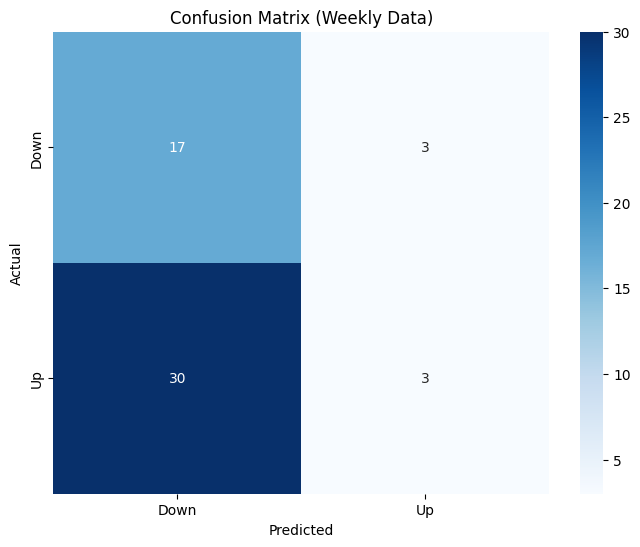

Random Forest Train Predictions:
        Date  Prediction
0 2000-10-22           0
1 2000-10-29           1
2 2000-11-05           0
3 2000-11-12           1
4 2000-11-19           0
Random Forest Test Predictions:
        Date  Prediction
0 2024-01-07           0
1 2024-01-14           0
2 2024-01-21           0
3 2024-01-28           0
4 2024-02-04           0


In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define features and target using weekly data
feature_cols = [
    'Close', 
    'MA10', 
    'Volatility', 
    'ROC', 
    'RSI', 
    'Lag1', 'Lag2'
]

X = data_weekly[feature_cols]
y = (data_weekly['Close'].shift(-1) > data_weekly['Close']).astype(int)
data_weekly.dropna(inplace=True)

# Split into train and test based on year 2024
train_data = data_weekly.loc[:"2024-01-01"].iloc[:-1]  # Train data up to 2023
test_data = data_weekly.loc["2024-01-01":]            # Test data for 2024

X_train = train_data[feature_cols]
y_train = train_data['Target']
X_test = test_data[feature_cols]
y_test = test_data['Target']

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)  # Predictions for training data
y_test_pred = model.predict(X_test)    # Predictions for testing data

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy:.3f}")
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred, zero_division=0))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix (Weekly Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create separate DataFrames for train and test predictions
train_df = pd.DataFrame({
    'Date': X_train.index,  # Dates from train set
    'Prediction': y_train_pred
})
test_df = pd.DataFrame({
    'Date': X_test.index,  # Dates from test set
    'Prediction': y_test_pred
})

# Save train and test predictions to separate CSV files
train_df.to_csv('random_forest_train_predictions.csv', index=False)
test_df.to_csv('random_forest_test_predictions.csv', index=False)

# Display the DataFrames
print("Random Forest Train Predictions:")
print(train_df.head())
print("Random Forest Test Predictions:")
print(test_df.head())


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'bootstrap': True, 'max_depth': 14, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 137}
Best Accuracy (CV): 0.5366180349488955
Accuracy: 0.542
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.43      0.45       110
           1       0.59      0.63      0.61       143

    accuracy                           0.54       253
   macro avg       0.53      0.53      0.53       253
weighted avg       0.54      0.54      0.54       253



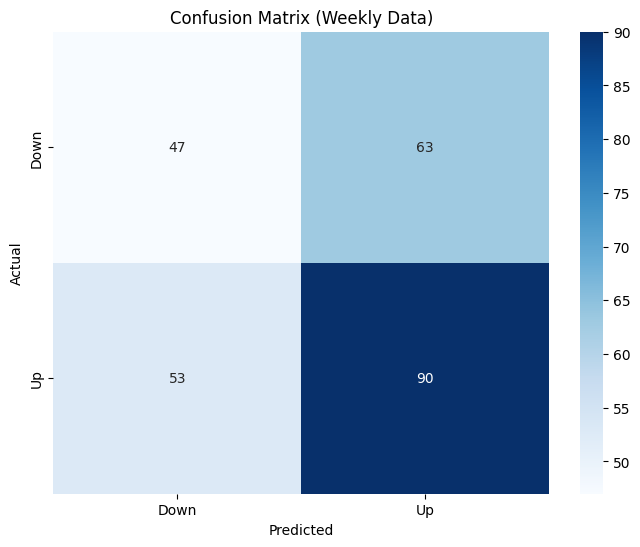

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt

feature_cols = [
    'Close', 
    'MA10', 
    'Volatility', 
    'ROC', 
    'RSI', 
    'Lag1', 'Lag2'
]

X = data_weekly[feature_cols]
y = (data_weekly['Close'].shift(-1) > data_weekly['Close']).astype(int)
data_weekly.dropna(inplace=True)  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_dist = {
    'n_estimators': randint(50, 200), 
    'max_depth': randint(5, 20),     
    'min_samples_split': randint(2, 10),  
    'min_samples_leaf': randint(1, 10),   
    'max_features': ['sqrt', 'log2', None],  
    'bootstrap': [True, False]        
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=20,  
    scoring='accuracy',
    cv=3,  
    verbose=1,
    random_state=42,
    n_jobs=-1  
)

random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy (CV):", random_search.best_score_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix (Weekly Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

start_date = "2000-10-16"
end_date = "2024-02-12"
new_dates = pd.date_range(start=start_date, end=end_date, freq='W')  

print(f"Expected Rows: {len(data)}")
print(f"Generated Weekly Dates: {len(new_dates)}")
data.index = new_dates  


MSE: 6023.960
RMSE: 77.614
MAE: 61.208
R²: 0.989


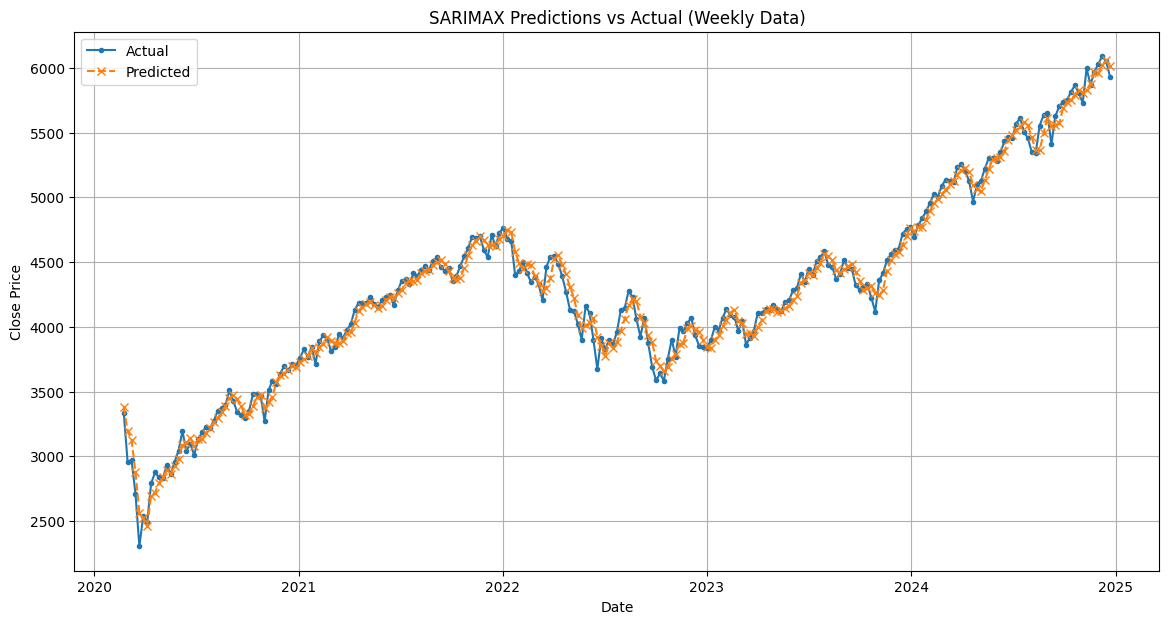

In [128]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

data_weekly['Target'] = data_weekly['Close'].shift(-1) 
data_weekly.dropna(inplace=True)

X = data_weekly[['MA10', 'Volatility', 'ROC', 'RSI']]
y = data_weekly['Target']

train_size = int(len(data_weekly) * 0.8)
train, test = data_weekly[:train_size], data_weekly[train_size:]

model = SARIMAX(train['Close'], 
                exog=train[['MA10', 'Volatility', 'ROC', 'RSI']],  
                order=(1, 1, 1),  
                seasonal_order=(1, 1, 1, 52))  
results = model.fit(disp=False)

pred = results.predict(start=len(train), end=len(data_weekly)-1, 
                        exog=test[['MA10', 'Volatility', 'ROC', 'RSI']], dynamic=False)

mse = mean_squared_error(test['Close'], pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['Close'], pred)
r2 = r2_score(test['Close'], pred)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

plt.figure(figsize=(14, 7))
plt.plot(test.index, test['Close'], label='Actual', marker='.')
plt.plot(test.index, pred, label='Predicted', linestyle='--', marker='x')
plt.title('SARIMAX Predictions vs Actual (Weekly Data)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
